# Predicting the sale price of Bulldozers 🚜 using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of bulldozers, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

Dataset is available for [download](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) in Kaggle in 3 sets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

As mentioned in [Kaggle](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation), The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note** : The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides the Data Dictionary where all the features are defined with it's description.

Check out the [Data Dictionary](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) section in Data tab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [80]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
# missing values in dataset
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [9]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


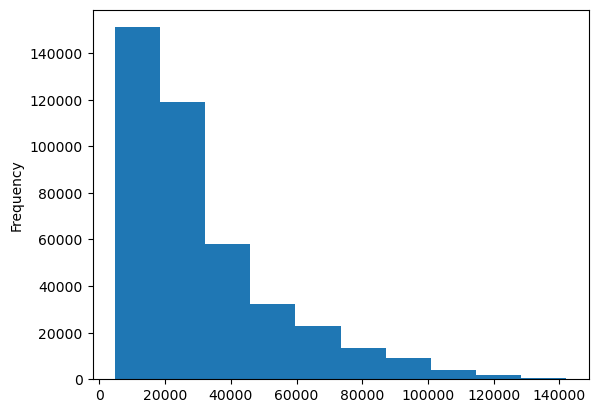

In [12]:
df.SalePrice.plot.hist();

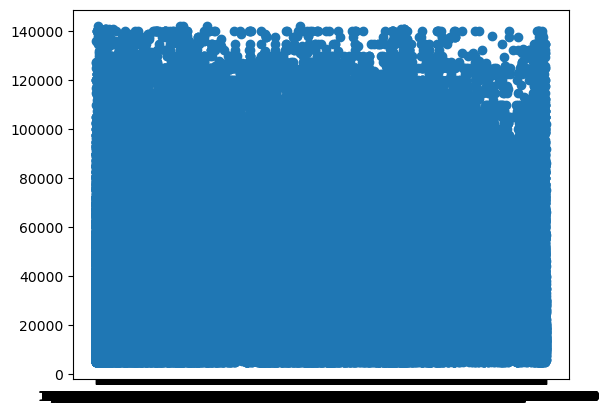

In [11]:
fig, ax = plt.subplots()
ax.scatter(df.saledate, df.SalePrice);

Notice, we plotted scatter graph, where SaleDate is on X-axis and SalePrice on Y-axis, but SaleDate is not visible enough and not giving some valuable information. This is happening because `saledate`'s `dtype` is `object`. It should be `datatime`. 

So we need to parse it using `parse_dates` property at the time of importing the data.

### Parse Dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [2]:
# importing the data again with parse dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [15]:
df.saledate.dtype 

dtype('<M8[ns]')

In `numpy`, both `datetime64` and `<M8` are datetime datatype.

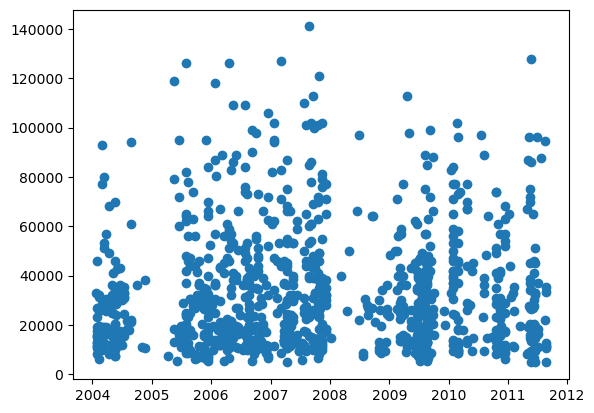

In [20]:
# lets plot the scatter graph again,
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

In [24]:
# sorting the data by saledate
df.sort_values("saledate").head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [26]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort Dataframe by saledate

When working with time series data, it's a good idea to sort it by a date.

In [7]:
# sort the dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)

df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [29]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Make a copy of Original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [36]:
# make a copy
df_tmp = df.copy()

In [37]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Feature Engineering

It means, we can add some columns in the dataset based on the data available for our model or may be we need to manipulate some columns if there are some missing values.

Let's see first the datetime datatype `saledate` and enrich it's different DateTimeIndex provided by [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

In [38]:
df_tmp.saledate[:1].dt.year

205615    1989
Name: saledate, dtype: int64

In [6]:
df_tmp.saledate[:1].dt.day

0    16
Name: saledate, dtype: int64

In [35]:
df_tmp.saledate[:1]

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [39]:
# adding some columns in the dataframe

df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [11]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [40]:
# Now we've enriched our DataFrame with date time features, we can remove the saledate column
df_tmp.drop("saledate", axis = 1, inplace = True)

Now, we are in the stage where we can start our modelling with any Scikit learn estimator for Regression problem.

But, we already know that we have many missing data and also many columns are having non-numeric values due to this estimators will throw error when it'll be fitted into the model.

So for that, we need to fill those missing data and convert non-numeric values into numeric values.

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas [here](https://pandas.pydata.org/docs/reference/arrays.html) and identify different datatype contains in DataFrame i.e also called Dtype introspection can be found [here](https://pandas.pydata.org/docs/reference/arrays.html#utilities).

In [13]:
# this is the general utility function to identify whether the column is a string type or not, likewise we can 
# identify other types as well

pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [20]:
# list all the columns which contains string
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
# here content is the value containes in that column and label is the column name

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
# next, we want to convert all these string contained columns into pandas categories dtype

for label,content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [28]:
# basically pandas converted those strings into categories and now they will be treated as numeric like 0,1,2
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [29]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [30]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories dtype, we now have a way to access all of our data in the form of numbers.

But we still have bunch of missing data...

Before that let's export the preprocessed data into csv file.

In [43]:
df_tmp.to_csv("data/bluebook-for-bulldozers/train_preprocessed_tmp.csv", index=False)

In [64]:
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_preprocessed_tmp.csv", low_memory = False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling the missing Numerical data


In [57]:
# missing data in each columns
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [69]:
# first check which of them are numerical columns

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):         
            print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
auctioneerID_is_missing
MachineHoursCurrentMeter_is_missing


In [66]:
# check which of them have missing data

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## Adding a new binary column as a marker whether the identified column has missing data or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            ## filling the median to the missing data
            df_tmp[label] = content.fillna(content.median())
            ## filling with median instead of mean because median is more robust    

In [54]:
pd.isnull(df_tmp.auctioneerID).sum()

0

In [67]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [70]:
# check if we have still any numeric missing data

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):         
        if pd.isnull(content).sum():
            print(label)

### Filling missing Categorical Values and turning them into numbers

In [71]:
# print out all the categorical columns or which are non-numerical values

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [73]:
# fill the missing categorical values with default code and turn them into numbers as well
# for eg,
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

So we are going to assign them with codes to turn them into numbers and add +1 because by default if there is any missing category in these columns, it assigned with -1

In [74]:
pd.Categorical(df_tmp.UsageBand).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [77]:
# Turn categorical variables into numbers and fill missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary column to indicate whether sample had missing values or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # turn them into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [81]:
# check if there any missing values
for label, content in df_tmp.items():
    if content.isna().sum():
        print(label)        

### Save the preprocessed data

In [83]:
df_tmp.to_csv("data/bluebook-for-bulldozers/train_preprocessed_tmp.csv", index = False)

In [2]:
# importing the data to check
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_preprocessed_tmp.csv", low_memory=False)

In [3]:
df_tmp.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356
datasource,132,132,132,132,132,132,132,132,132,132
...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True


## 5. Modelling

Now we have converted all the non-numeric data into numeric and also filled the missing values, then we are ready to start the modelling.

In [4]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_tmp.drop("SalePrice", axis = 1)
y = df_tmp["SalePrice"]

# splitting the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

model = RandomForestRegressor(n_jobs=-1, random_state=42) # n_jobs = -1, to utilize full processing power of computer

model.fit(X_train, y_train)

model.score(X_test, y_test)

CPU times: user 13min 3s, sys: 8.78 s, total: 13min 11s
Wall time: 1min 44s


0.9091781218563466

The above scores are good, but the way that we splitting our data is wrong, In the Kaggle description it's mentioned that the data is splitted in Train, Valid and Test set which is an ideal scenario to divide the data in 3sets and then fit the train set into model.

One more thing that needed to be done was to split the data first before processing it or fill the missing data. 

So, this way of evaluating our model is **Wrong**.

**Correct Way** is to split the data first then pre-process it and then train, validate and evaluate the model.

So, for other projects we have to follow that process.

For now, lets split the processed data and split into train and valid set manually as per the information given in Kaggle.

* Train set - until 2011
* Valid set - only 2012

Since it's a Time Series data, and we have sorted the data into ascending order of SaleYear, so we can split it.

In [5]:
df_valid = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]


In [6]:
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis = 1), df_valid["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [7]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

## Building an Evaluation Function

By Default the `model.score()` returns the Coeficient of Determination i.e $R^2$ value, but our Evaluation criteria says we want the RMSLE (Root Mean Squared Log Error) evaluation metric, so we need to create a custom evaluation function for this.

In [8]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Return the Root Mean Squared Log Error Score between the actual results and predicted results
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Custom function to evaluate Train and Valid scores
def show_scores(model):
    train_preds = model.predict(X_train)    
    val_preds = model.predict(X_valid)
    scores = {"Train R2 Score": r2_score(y_train, train_preds),
              "Validate R2 Score": r2_score(y_valid, val_preds),
              "Train Mean Absolute Error": mean_absolute_error(y_train, train_preds),
              "Valid Mean Absolute Error": mean_absolute_error(y_valid, val_preds),              
              "Train Root Mean Squared Log Error": rmsle(y_train, train_preds),
              "Valid Root Mean Squared Log Error": rmsle(y_valid, val_preds)}    
    return scores

## Testing our model on a subset (to tune the hyperparameters)

It's going to take too much time as of now if we train and validate the model using all the sample even using full computation power. And it might be time taking for the experiments.

So what we do, we can limit the model by reducing the number of samples.

We can use `max_samples` hyperparameter to 10000 samples to do our experiments

In [10]:
%%time

model = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples=10000)

model.fit(X_train, y_train)

CPU times: user 30 s, sys: 454 ms, total: 30.5 s
Wall time: 4.33 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [11]:
show_scores(model)

{'Train R2 Score': 0.8606658995199189,
 'Validate R2 Score': 0.8320374995090507,
 'Train Mean Absolute Error': 5561.2988092240585,
 'Valid Mean Absolute Error': 7177.26365505919,
 'Train Root Mean Squared Log Error': 0.257745378256977,
 'Valid Root Mean Squared Log Error': 0.29362638671089003}

We can't manually adjust the hyperparameters or Tune the model by Hand, so we need a library which will automatically do this for us, which is possible by `RandomizedSearchCV`

### Tuning the hyperparameters using RandomizedSearchCV

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameteres grid for RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [10000],
           "max_features":[0.5, 1,"sqrt"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), 
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

In [16]:
%%time
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 30.4 s, sys: 13.9 s, total: 44.3 s
Wall time: 1min 5s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [17]:
show_scores(rs_model)

{'Train R2 Score': 0.8345341670937567,
 'Validate R2 Score': 0.8202625400734915,
 'Train Mean Absolute Error': 6088.531708052924,
 'Valid Mean Absolute Error': 7434.363302470936,
 'Train Root Mean Squared Log Error': 0.2762107053248735,
 'Valid Root Mean Squared Log Error': 0.30182694456280734}

So above evaluation scores are displaying for model trained with 10000 samples, lets train with all samples

In [18]:
%%time

rf_all_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),           
           "max_features":[0.5, 1,"sqrt"]}


# Instantiate RandomizedSearchCV model
rs_all_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=None), 
                              param_distributions=rf_all_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)


rs_all_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 5min 14s, sys: 22.5 s, total: 5min 37s
Wall time: 7min 22s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [19]:
# Scores on all the samples
show_scores(rs_all_model)

{'Train R2 Score': 0.9326708249256538,
 'Validate R2 Score': 0.8769923584681001,
 'Train Mean Absolute Error': 3747.1246206282494,
 'Valid Mean Absolute Error': 6008.965004018384,
 'Train Root Mean Squared Log Error': 0.18062788037375388,
 'Valid Root Mean Squared Log Error': 0.2455447982053828}

In [20]:
# let's get the best params from it
rs_all_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [23]:
%%time

# if we check the evaluation scores on best params
ideal_model = RandomForestRegressor(n_jobs=-1,
                                   n_estimators= 70,
                                   min_samples_split=8,
                                   min_samples_leaf=9,
                                   max_features=0.5,
                                   max_depth=None,
                                   max_samples=None,
                                   random_state=42)

ideal_model.fit(X_train, y_train)

CPU times: user 4min 33s, sys: 1.96 s, total: 4min 35s
Wall time: 39.3 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=9, min_samples_split=8,
                      n_estimators=70, n_jobs=-1, random_state=42)

In [24]:
show_scores(ideal_model)

{'Train R2 Score': 0.9326708249256538,
 'Validate R2 Score': 0.8769923584681001,
 'Train Mean Absolute Error': 3747.1246206282494,
 'Valid Mean Absolute Error': 6008.965004018384,
 'Train Root Mean Squared Log Error': 0.18062788037375388,
 'Valid Root Mean Squared Log Error': 0.2455447982053828}

In [25]:
show_scores(rs_model)

{'Train R2 Score': 0.8345341670937567,
 'Validate R2 Score': 0.8202625400734915,
 'Train Mean Absolute Error': 6088.531708052926,
 'Valid Mean Absolute Error': 7434.363302470936,
 'Train Root Mean Squared Log Error': 0.2762107053248735,
 'Valid Root Mean Squared Log Error': 0.30182694456280734}

So it does optimized little bit, but it can be optimized/tuned even better by experimenting more. 

But let's go further try to test the model using Test Data.

## Importing Test Data to test the model

In [51]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                     low_memory = True,
                     parse_dates=["saledate"])

In [28]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


Notice that, it doesn't have **SalePrice** column, as it's a test data we want to predict the price. *That's our goal*

But the Test data is not yet ready to fit in the model as we have to preprocess it, it might have some missing data and also it contains string values which needed to convert into numeric.


## Preprocessing the data (getting the test dataset in the same format as training dataset)

In [59]:
def preprocess_data(df):
    """
    Performs transformations on df and return transformed df.
    """
    
    #df.sort_values(by=["saledate"], inplace=True, ascending=True)
    
    # Convert SaleDate into Numeric
    df["saleYear"] = df.saledate.dt.year
    df["saleDay"] = df.saledate.dt.day
    df["saleMonth"] = df.saledate.dt.month    
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    # Drop the saledate after converting it into Numeric
    df.drop("saledate", axis=1, inplace = True)
    
    # Fill Missing Values and Convert them into numbers
    for label, content in df.items():
        # check for string columns and convert them into pandas category
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
        # fill missing numeric values
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Adding the binary column for identification that previously it had missing values
                df[label+"_is_missing"] = pd.isnull(content)
                # fill the missing data with the median
                df[label] = content.fillna(content.median())
        # fill the missing categorical values and convert them into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Adding the binary column for identification that previously it had missing values
            df[label+"_is_missing"] = pd.isnull(content)
            # fill the missing data with the median
            df[label] = pd.Categorical(content).codes + 1
    
    
    return df

In [60]:
df_tmp_test = df_test.copy()

In [61]:
df_tmp_test_processed = preprocess_data(df_tmp_test)

In [42]:
df_tmp_test_processed.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True


In [62]:
df_tmp_test_processed.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

Now we are ready to use this data for testing our model

In [44]:
# Make predictions on updated dataframe

test_preds = ideal_model.predict(df_tmp_test_processed)

/Users/starlord/Desktop/Work/Learn/DataScience/bulldozer-price-prediction-ml-project/env/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [63]:
# we can also find how the columns differ using sets
set(X_train.columns) - set(df_tmp_test_processed.columns)

{'auctioneerID_is_missing'}

In [64]:
# manually adding the missing column in test dataframe
df_tmp_test_processed["auctioneerID_is_missing"] = False

In [57]:
df_tmp_test_processed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions

In [65]:
test_preds = ideal_model.predict(df_tmp_test_processed)

/Users/starlord/Desktop/Work/Learn/DataScience/bulldozer-price-prediction-ml-project/env/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


We've made some predictions but they're not in the same format Kaggle is asking for:
    

In [66]:
# format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_tmp_test_processed["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19779.663271
1,1227844,17937.240834
2,1227847,51209.425100
3,1227848,69649.812510
4,1227863,46679.359315
...,...,...
12452,6643171,43369.700051
12453,6643173,13723.412345
12454,6643184,13505.970029
12455,6643186,16609.133076


In [67]:
# Export predictiont data to CSV
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable (SalePrice)**

In [68]:
# find feature importance of our model
ideal_model.feature_importances_

array([2.99609207e-02, 1.79368963e-02, 4.33233885e-02, 1.57709662e-03,
       2.04621908e-03, 2.11792487e-01, 2.19047972e-03, 7.11340568e-04,
       4.66728774e-02, 4.41269677e-02, 6.27087463e-02, 4.26739864e-03,
       1.52070892e-02, 1.58889970e-01, 4.82168244e-02, 3.80983552e-03,
       2.34796285e-03, 2.87731817e-03, 3.61216283e-03, 6.53754413e-02,
       2.80818307e-04, 4.45608645e-05, 7.70594155e-04, 2.59263423e-04,
       1.01433050e-03, 3.49842049e-05, 1.17441952e-03, 7.42267576e-03,
       1.84118729e-04, 1.27629426e-03, 3.85968995e-03, 3.05645841e-03,
       4.43159292e-03, 2.47702635e-03, 2.56327271e-04, 5.90707173e-03,
       6.71911638e-04, 1.53637975e-02, 3.20079020e-04, 3.14122540e-03,
       1.17148910e-03, 7.02242860e-04, 8.13777568e-04, 4.70561938e-04,
       4.30418316e-04, 1.89348619e-04, 2.00873616e-04, 2.10156985e-03,
       8.06381486e-04, 3.67467811e-04, 4.35060885e-04, 7.35043990e-02,
       2.97335053e-03, 3.41476092e-03, 1.67254202e-03, 7.18285399e-03,
      

In [69]:
len(ideal_model.feature_importances_)

102

This number seems similar to `X_train` length, so it means that it's showing the feature importance representated by a number for each column.

If we plot this using any figure, it might help us to understand it better.

First, lets map these into a dictionary.

In [70]:
len(X_train.columns)

102

In [76]:
# Helper function for plotting feature importance
def plot_importance(columns, importances, n=20):    
    df = (pd.DataFrame({"features": columns,
                        "importances": importances})
          .sort_values("importances", ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

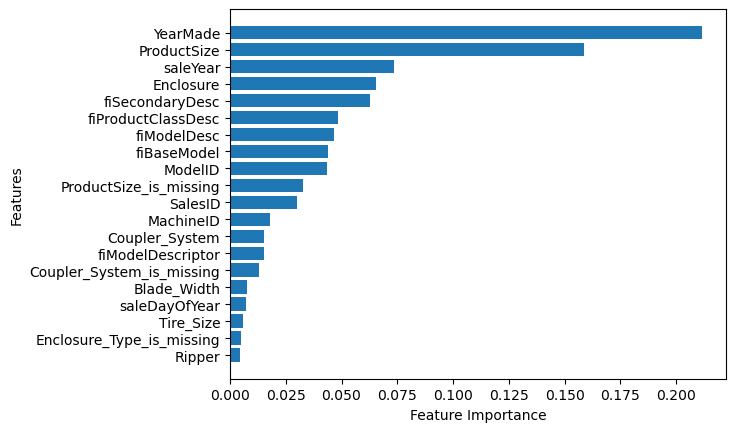

In [77]:
plot_importance(X_train.columns, ideal_model.feature_importances_)

In [81]:
df["Enclosure"].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

**Question to Finish** : Why might knowing the feature importances of a trained machine learning model be helpful?
    
**Final Challenge**: What other machine learning models could you try on your dataset? Check out Regression section of scikit-learn chart for example XGBoost.ai or CatBoost.ai